<a href="https://colab.research.google.com/github/Praisy-E/Code-for-all/blob/main/Translations_and_Rotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


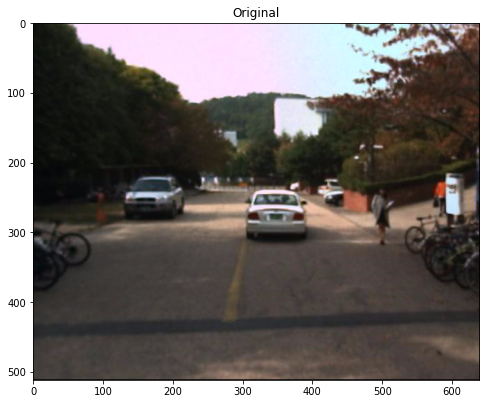

In [33]:
# Load our input image
image = cv2.imread('/content/drive/MyDrive/GAN/visible-test/I02195.jpg')
imshow("Original", image)



In [34]:
# Store height and width of the image
height, width = image.shape[:2]

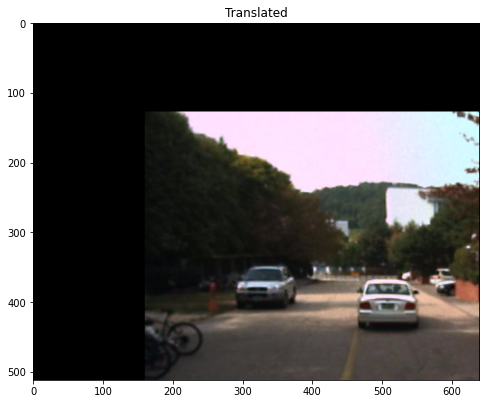

In [35]:
# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4
# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)


In [36]:
# What does T look like
print(T)

print(height, width )

[[  1.   0. 160.]
 [  0.   1. 128.]]
512 640


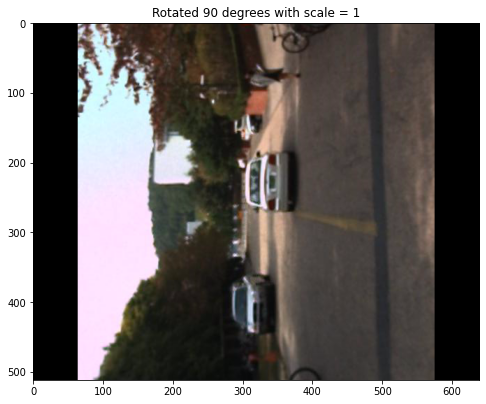

In [37]:
#cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)
# Load our image
image = cv2.imread('/content/drive/MyDrive/GAN/visible-test/I02195.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)



[[ 3.061617e-17  5.000000e-01  1.920000e+02]
 [-5.000000e-01  3.061617e-17  4.160000e+02]]


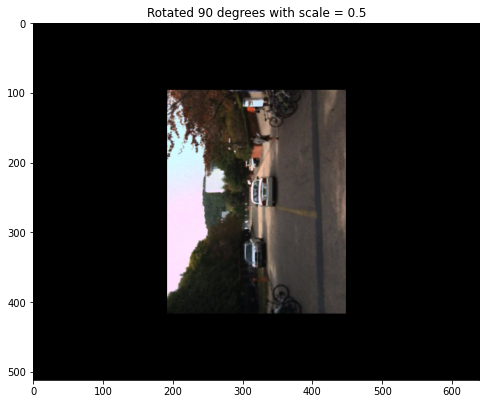

In [38]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

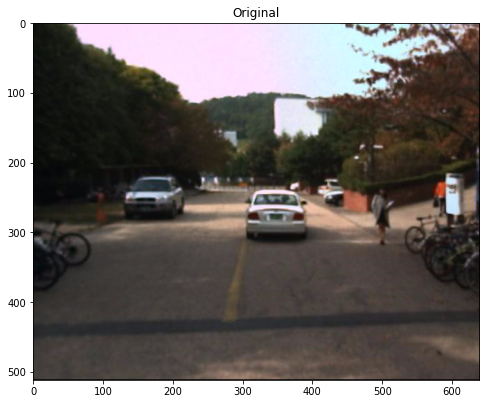

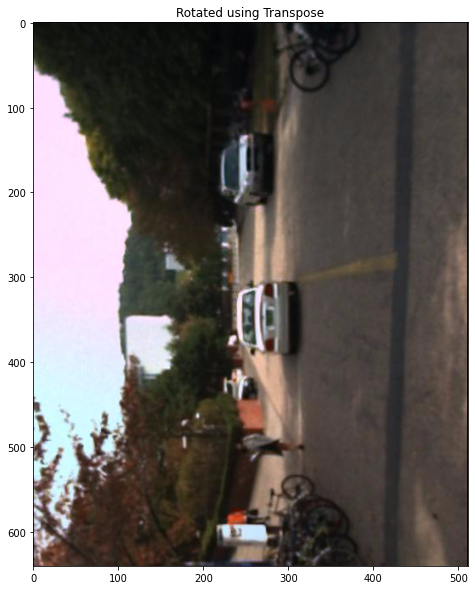

In [39]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

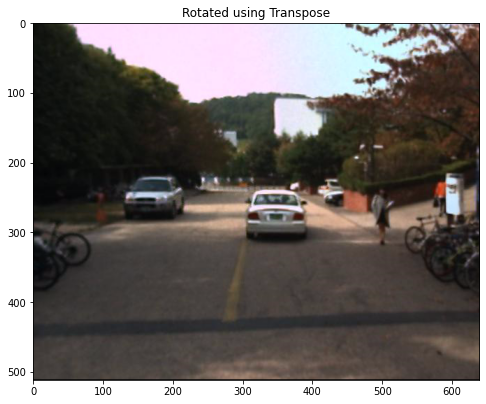

In [40]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

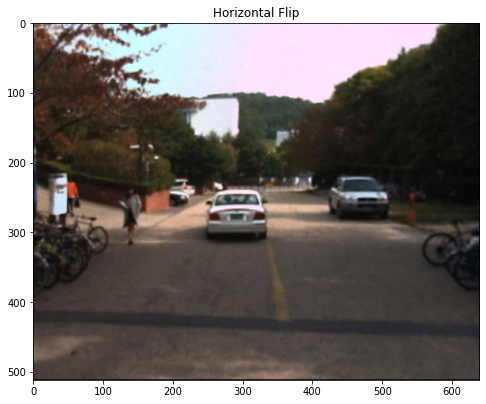

In [41]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)